# Overview of available variables and analysis results

Data analysis is supposed to be done in script `EVAL_SCRIPT.py` which can be found in the parent directory. This script is supposed to create output files and plots that may be used here to summarise the results.

In [1]:
import os
import pyaerocom as pya
pya.change_verbosity('critical')

import EVAL_POST as helpers

2018-08-14 14:59:22,186:INFO:
Reading aliases ini file: /home/jonasg/github/pyaerocom/pyaerocom/data/aliases.ini


Check for updates in file containing models.

In [2]:
model_info_file = '/lustre/storeA/project/aerocom/aerocom-users-database/AEROCOM-PHASE-III/reference-list'

if os.path.exists(model_info_file):
    with open(model_info_file) as f:
        for line in f:
            if line.strip():
                print(line)

1 NorESM: AlfKirkevag MetNo

  CAM6-Oslo_NF2kNucl_7jun2018AK

attention

is on /lustre/storeA/project/aerocom/aerocom2/NorESM_SVN_TEST

2 OsloCTM3 : Gunnar Myhre - Marianne Lund CICERO

OsloCTM2_INSITU  (includes extinction and absorption coefficients)

is probably outdated...

3 TM5-AP3: Twan van Noye KNMI

TM5_AP3-CTRL2016

and

TM5_AP3-INSITU (daily files are missing, but Jan should produce them)



### Define models, obsnetworks, years, and variables

In [3]:
YEARS = [2010, 2008, 9999]

# List of models considered
MODEL_LIST = ['CAM6-Oslo_NF2kNucl_7jun2018AK',
              'OsloCTM2_INSITU',
              'TM5_AP3-CTRL2016',
              'TM5_AP3-INSITU']

# List of ungridded obsnetworks considered (so far)
UNGRIDDED_OBS_NETWORKS = {'AeronetSunV2Lev2.daily' : 'od550aer',
                          'AeronetSunV3Lev2.daily' : 'od550aer',
                          'AeronetSDAV2Lev2.daily' : ['od550lt1aer', 
                                                      'od550gt1aer'],
                          'AeronetSDAV3Lev2.daily' : ['od550lt1aer', 
                                                      'od550gt1aer'],
                          'AeronetInvV2Lev2.daily' : 'abs550aer',
                          'AeronetInvV3Lev2.daily' : 'abs550aer'
                          }

# Get unique variables
VARS = []
for k, v in UNGRIDDED_OBS_NETWORKS.items():
    if isinstance(v, str):
        VARS.append(v)
    else:
        VARS.extend(v)
VARS = list(dict.fromkeys(VARS))

### Import model results

In [4]:
read_models = pya.io.ReadGriddedMulti(MODEL_LIST)
read_models.read_individual_years(VARS, YEARS)

OrderedDict([('CAM6-Oslo_NF2kNucl_7jun2018AK',
              <pyaerocom.io.readgridded.ReadGridded at 0x7f667bc0e0f0>),
             ('OsloCTM2_INSITU',
              <pyaerocom.io.readgridded.ReadGridded at 0x7f667bc190b8>),
             ('TM5_AP3-CTRL2016',
              <pyaerocom.io.readgridded.ReadGridded at 0x7f667bc19400>),
             ('TM5_AP3-INSITU',
              <pyaerocom.io.readgridded.ReadGridded at 0x7f667bc0ecc0>)])

Print overview of what is in the models

In [5]:
print(read_models)


Pyaerocom ReadGriddedMulti
--------------------------
Model IDs: ['CAM6-Oslo_NF2kNucl_7jun2018AK', 'OsloCTM2_INSITU', 'TM5_AP3-CTRL2016', 'TM5_AP3-INSITU']

Loaded data:

Pyaerocom ReadGridded
---------------------
Model ID: CAM6-Oslo_NF2kNucl_7jun2018AK
Data directory: /lustre/storeA/project/aerocom/aerocom2/NorESM_SVN_TEST/CAM6-Oslo_NF2kNucl_7jun2018AK/renamed
Available variables: ['abs440aer', 'abs500aer', 'abs5503Daer', 'abs550aer', 'abs550aercs', 'abs550bc', 'abs550dryaer', 'abs550dust', 'abs550oa', 'abs550so4', 'abs550ss', 'abs670aer', 'abs870aer', 'airmass', 'area', 'asy3Daer', 'bc5503Daer', 'cheaqpso4', 'chegpso4', 'chepso2', 'cl3D', 'clt', 'drybc', 'drydms', 'drydust', 'dryoa', 'dryso2', 'dryso4', 'dryss', 'ec5503Daer', 'ec550dryaer', 'emibc', 'emidms', 'emidust', 'emioa', 'emiso2', 'emiso4', 'emiss', 'hus', 'landf', 'loadbc', 'loaddms', 'loaddust', 'loadoa', 'loadso2', 'loadso4', 'loadss', 'mmraerh2o', 'mmrbc', 'mmrdu', 'mmroa', 'mmrso4', 'mmrss', 'od440aer', 'od440csaer', '

## Results

This section contains results from the analysis that can be performed using the script ``EVAL_SCRIPT.py``. The following lines read all result CSV files that are stored in the result folder, imports them and extracts **Bias (nmb), RMS and Pearson R coefficient)** as one multiindex dataframe.

In [104]:
results = helpers.load_result_files()
results = helpers.calc_stats(results)
    
table = helpers.to_multiindex_dataframe(results)

Reading result file od550lt1aer_TM5_AP3-CTRL2016_AeronetSDAV3Lev2.daily_2008_monthly_WORLD.csv
Reading result file od550aer_TM5_AP3-CTRL2016_AeronetSunV3Lev2.daily_2010_monthly_WORLD.csv
Reading result file abs550aer_TM5_AP3-CTRL2016_AeronetInvV3Lev2.daily_2008_monthly_WORLD.csv
Reading result file od550aer_OsloCTM2_INSITU_AeronetSunV2Lev2.daily_2008_monthly_WORLD.csv
Reading result file od550aer_OsloCTM2_INSITU_AeronetSunV3Lev2.daily_2008_monthly_WORLD.csv
Reading result file abs550aer_TM5_AP3-INSITU_AeronetInvV3Lev2.daily_2010_monthly_WORLD.csv
Reading result file od550aer_TM5_AP3-INSITU_AeronetSunV3Lev2.daily_2010_monthly_WORLD.csv
Reading result file od550lt1aer_TM5_AP3-CTRL2016_AeronetSDAV2Lev2.daily_2008_monthly_WORLD.csv
Reading result file abs550aer_TM5_AP3-CTRL2016_AeronetInvV2Lev2.daily_2010_monthly_WORLD.csv
Reading result file abs550aer_TM5_AP3-INSITU_AeronetInvV2Lev2.daily_2010_monthly_WORLD.csv
Reading result file od550lt1aer_TM5_AP3-CTRL2016_AeronetSDAV2Lev2.daily_2010_m

{'var': 'abs550aer',
 'model_id': 'TM5_AP3-CTRL2016',
 'obs_id': 'AeronetInvV3Lev2.daily',
 'year': 2008,
 'ts_type': 'monthly',
 'filtername': 'WORLD',
 'data':           obs     model
 0    0.028249  0.012100
 1    0.022783  0.013933
 2    0.027836  0.018303
 3    0.025394  0.022764
 4    0.023326  0.023569
 5    0.030142  0.023000
 6    0.028985  0.028583
 7    0.024974  0.011415
 8    0.028120  0.023190
 9    0.038663  0.027301
 10   0.055231  0.026203
 11   0.060244  0.023896
 12   0.038400  0.021593
 13   0.031717  0.019815
 14   0.048034  0.025499
 15   0.041807  0.030561
 16   0.032574  0.016954
 17   0.038443  0.015738
 18   0.028186  0.027133
 19   0.040813  0.022571
 20   0.026522  0.011475
 21   0.019304  0.006055
 22   0.060087  0.001876
 23   0.009418  0.001874
 24   0.004650  0.001949
 25   0.004410  0.002468
 26   0.097262  0.002608
 27   0.019004  0.002907
 28   0.064167  0.034605
 29   0.025135  0.006382
 ..        ...       ...
 683  0.105217  0.056566
 684  0.087400

In [105]:
table.sort_index(inplace=True)
table

Bias  \
Model            Year Variable    Obs                                  
OsloCTM2_INSITU  2008 od550aer    AeronetSunV2Lev2.daily  -48.096741   
                                  AeronetSunV3Lev2.daily  -54.993631   
TM5_AP3-CTRL2016 2008 abs550aer   AeronetInvV2Lev2.daily  -48.434794   
                                  AeronetInvV3Lev2.daily  -39.669155   
                      od550aer    AeronetSunV2Lev2.daily    2.847311   
                                  AeronetSunV3Lev2.daily   -8.717583   
                      od550lt1aer AeronetSDAV2Lev2.daily -100.000000   
                                  AeronetSDAV3Lev2.daily -100.000000   
                 2010 abs550aer   AeronetInvV2Lev2.daily  -47.093272   
                                  AeronetInvV3Lev2.daily  -37.781593   
                      od550aer    AeronetSunV2Lev2.daily    3.887904   
                                  AeronetSunV3Lev2.daily   -4.165051   
                      od550lt1aer AeronetSDAV2Lev2.daily -100.000000   
                                  AeronetSDAV3Lev2.daily -100.000000   
TM5_AP3-INSITU   2010 abs550aer   AeronetInvV2Lev2.daily  -51.864067   
                                  AeronetInvV3Lev2.daily  -43.413967   
                      od550aer    AeronetSunV2Lev2.daily   -0.106881   
                                  AeronetSunV3Lev2.daily   -8.173309   
                      od550lt1aer AeronetSDAV2Lev2.daily   14.695330   
                                  AeronetSDAV3Lev2.daily    5.313304   

                                                               RMS         R  
Model            Year Variable    Obs                                         
OsloCTM2_INSITU  2008 od550aer    AeronetSunV2Lev2.daily  0.174878  0.630010  
                                  AeronetSunV3Lev2.daily  0.221493  0.585083  
TM5_AP3-CTRL2016 2008 abs550aer   AeronetInvV2Lev2.daily  0.026552  0.536176  
                                  AeronetInvV3Lev2.daily  0.022323  0.552968  
                      od550aer    AeronetSunV2Lev2.daily  0.119424  0.792646  
                                  AeronetSunV3Lev2.daily  0.147267  0.769819  
                      od550lt1aer AeronetSDAV2Lev2.daily  0.188389       NaN  
                                  AeronetSDAV3Lev2.daily  0.229937       NaN  
                 2010 abs550aer   AeronetInvV2Lev2.daily  0.027098  0.507868  
                                  AeronetInvV3Lev2.daily  0.021601  0.578689  
                      od550aer    AeronetSunV2Lev2.daily  0.124163  0.770182  
                                  AeronetSunV3Lev2.daily  0.180897  0.608492  
                      od550lt1aer AeronetSDAV2Lev2.daily  0.184397       NaN  
                                  AeronetSDAV3Lev2.daily  0.199415       NaN  
TM5_AP3-INSITU   2010 abs550aer   AeronetInvV2Lev2.daily  0.029607  0.435821  
                                  AeronetInvV3Lev2.daily  0.024702  0.485296  
                      od550aer    AeronetSunV2Lev2.daily  0.127039  0.750653  
                                  AeronetSunV3Lev2.daily  0.184020  0.592350  
                      od550lt1aer AeronetSDAV2Lev2.daily  0.093908  0.760871  
                                  AeronetSDAV3Lev2.daily  0.102457  0.755768

Text(0.5,1,'Model Bias [%]')

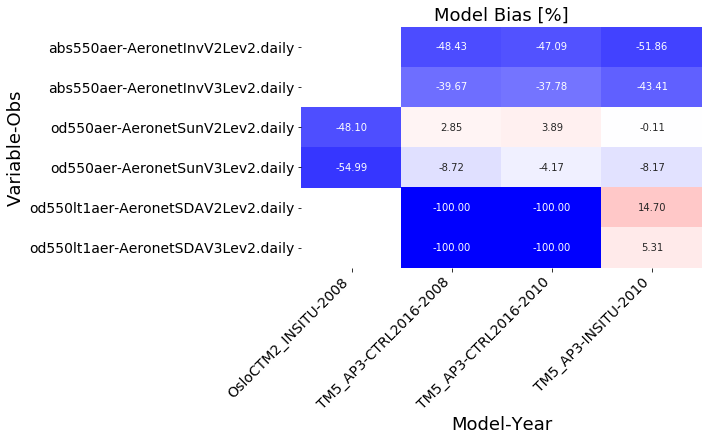

In [106]:
bias = table['Bias'].unstack(['Model', 'Year'])
ax = pya.plot.heatmaps.df_to_heatmap(bias, 
                                     color_rowwise=False,
                                     figsize=(10, 6))
ax.set_title('Model Bias [%]')

Text(0.5,1,'RMS')

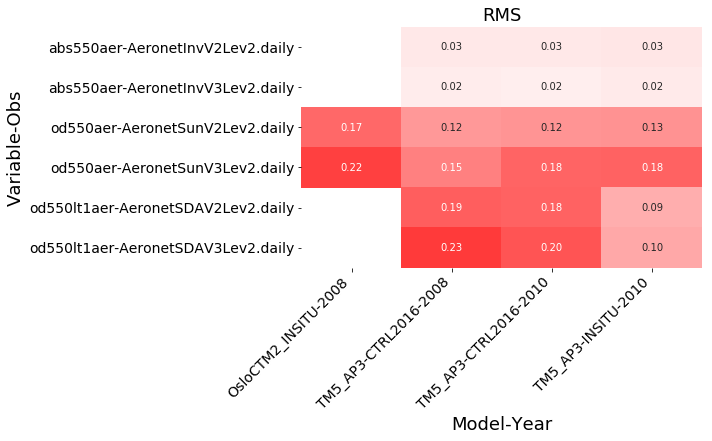

In [107]:
bias = table['RMS'].unstack(['Model', 'Year'])
ax = pya.plot.heatmaps.df_to_heatmap(bias, color_rowwise=False,
                                     figsize=(10, 6))
ax.set_title('RMS')

Text(0.5,1,'Pearson correlation')

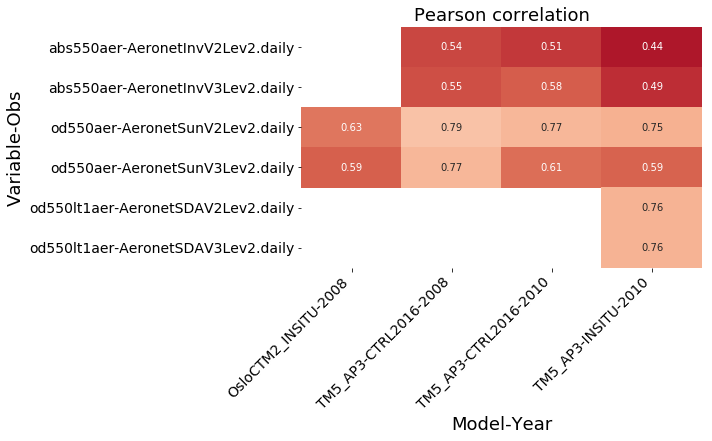

In [108]:
corr = table['R'].unstack(['Model', 'Year'])

ax = pya.plot.heatmaps.df_to_heatmap(corr, cmap='RdGy', color_rowwise=False,
                                     center=1, figsize=(10, 6))
ax.set_title('Pearson correlation')

## Retrieval of statistical parameters from collocated data (testing)

Currently, the statistical parameters like RMS are computed from the difference vector of the model values and the corresponding observations. This method does not take into account situations where the slope of the distribution in the scatter plot deviates from 1, i.e. where the performance of the model as a function of the retrieved parameter is dependent on the magnitude of the parameter. 

This section aims to illustrate this issue and suggests to use a linear fit (in loglog space) to consider both slope and offset (bias) of the model values relative to the observations.

### 2 examples

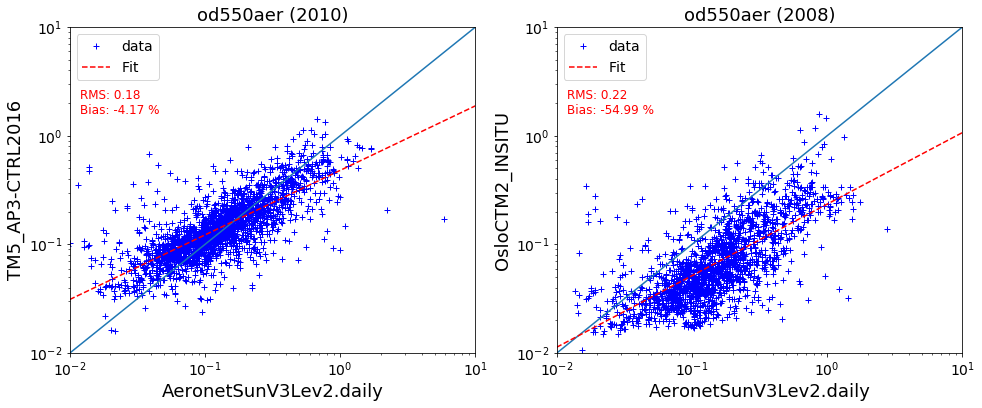

In [113]:
import matplotlib.pyplot as plt
def plot_scatter(res, ax):
    data=res['data']
    

    x,y = data['obs'], data['model']
    ax.loglog(x, y, ' +b', label='data')
    ax.set_xlim([.01, 10])
    ax.set_ylim([.01, 10])
    ax.plot([.01, 10], [.01, 10])

    ax.set_xlabel(res['obs_id'])
    ax.set_ylabel(res['model_id'])
    ax.set_title('{} ({})'.format(res['var'], res['year']))
    m, c  = np.polyfit(np.log(x), np.log(y), 1)
    xvals= np.linspace(.01, 10, 100)
    y_fit = np.exp(m*np.log(xvals) + c)
    ax.plot(xvals, y_fit, '--r', label='Fit')
    ax.text(0.012, 2.2, 'RMS: {:.2f}'.format(res['rms']), color='r', fontsize=12)
    ax.text(0.012, 1.6, 'Bias: {:.2f} %'.format(res['nmb']), color='r', fontsize=12)
    
    ax.legend()
    
    return ax

ex1 = results[1]
ex2 = results[4]
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))
plot_scatter(ex1, ax1)
plot_scatter(ex2, ax2)

Assuming that the observations are true, in the ideal case, the results should scatter around the one-one line in the plot, but clearly, the fitted result shows, that the distribution is slanted with respect to the one-one line. **This is not represented in the statistical parameters that are caclulated based on the difference signal**.

Let's look at the difference signal of both examples as a function of the AOD:

Text(0,0.5,'od550aer (model - obs)')

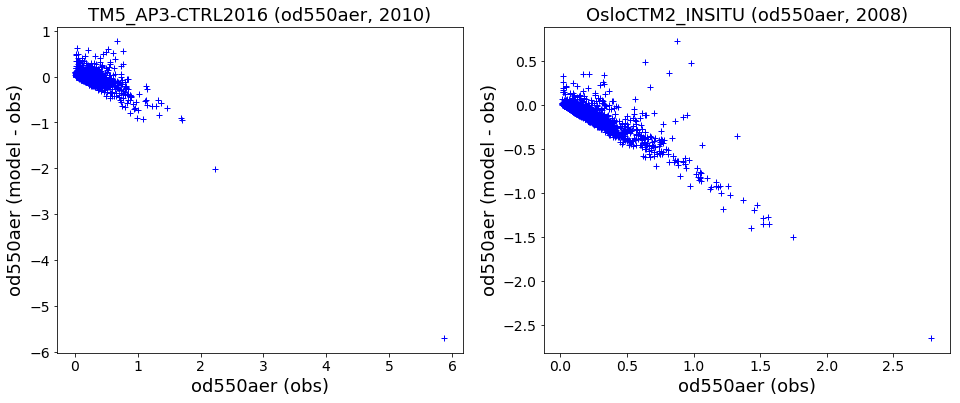

In [124]:
# cpmpute difference vectors for both example datasets
diff1 = ex1['data']['model'] - ex1['data']['obs']
diff2 = ex2['data']['model'] - ex2['data']['obs']

# plot differences against corresponding values (using obs values)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))

ax1.plot(ex1['data']['obs'], diff1, ' +b', label='Difference (example 1)')
ax1.set_title('{} ({}, {})'.format(ex1['model_id'], ex1['var'], ex1['year']))
ax1.set_xlabel('od550aer (obs)')
ax1.set_ylabel('od550aer (model - obs)')
ax2.plot(ex2['data']['obs'], diff2, ' +b', label='Difference (example 2)')
ax2.set_title('{} ({}, {})'.format(ex2['model_id'], ex2['var'], ex2['year']))
ax2.set_xlabel('od550aer (obs)')
ax2.set_ylabel('od550aer (model - obs)')

From the difference signals it becomes even more obvious that the ***performance*** of the models (i.e. their capability to *reproduce* the observations) is clearly dependent on the value of the AOD. E.g. model *OsloCTM2_INSITU 2008* shows linearly increasing deviations to the observations with increasing AOD. At low AODs, however, it matches considerably well.

**This is useful information and currently not represented by the statistical parameters that disregard the fact that the performance may be dependent on the values of the variable itself**

# Experimental area

2


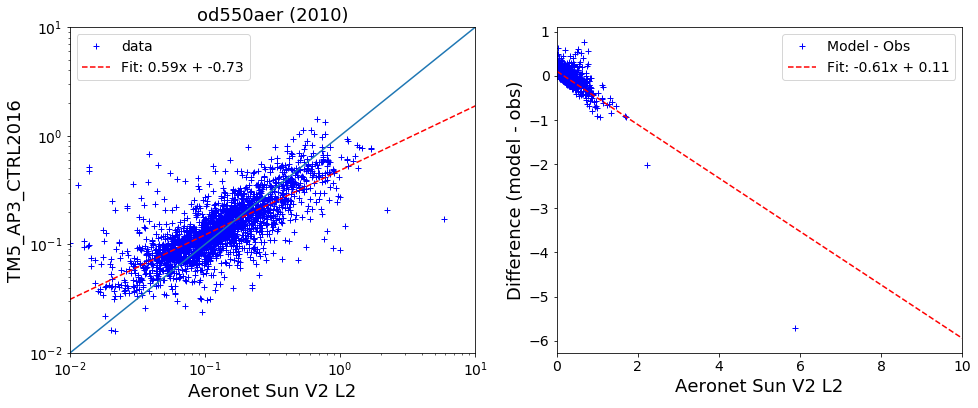

In [125]:
data = results[1]['data']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))

x,y = data['obs'], data['model']
ax1.loglog(x, y, ' +b', label='data')

m, c  = np.polyfit(np.log(x), np.log(y), 1)
xvals= np.linspace(.01, 10, 100)
y_fit = np.exp(m*np.log(xvals) + c)
ax1.plot(xvals, y_fit, '--r', label='Fit: {:.2f}x + {:.2f}'.format(m, c))
ax1.set_xlim([.01, 10])
ax1.set_ylim([.01, 10])
ax1.plot([.01, 10], [.01, 10])
ax1.legend()
ax1.set_xlabel('Aeronet Sun V2 L2')
ax1.set_ylabel('TM5_AP3_CTRL2016')
ax1.set_title('od550aer (2010)')

difference = y-x
ax2.plot(x, difference, ' +b', label="Model - Obs")
ax2.set_xlabel('Aeronet Sun V2 L2')
ax2.set_ylabel('Difference (model - obs)')


diff_fit = np.polyfit(x, difference, 1)
ax2.plot(xvals, np.poly1d(diff_fit)(xvals), '--r', label='Fit: {:.2f}x + {:.2f}'.format(diff_fit[0], diff_fit[1]))
ax2.legend()
ax2.set_xlim([0, 10])

/home/jonasg/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/jonasg/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


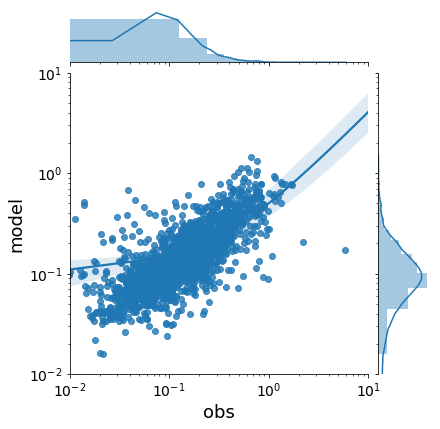

In [74]:
import seaborn as sns
#mybins=np.logspace(0,np.log(10),100)
g = sns.JointGrid('obs', 'model', data, xlim=[0.01,10],ylim=[0.01,10])
g = g.plot(sns.regplot, sns.distplot)
ax = g.ax_joint
ax.set_xscale('log')
ax.set_yscale('log')
g.ax_marg_x.set_xscale('log')
g.ax_marg_y.set_yscale('log')